In [276]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import datetime as dt
import pytz

## Gather

In [2]:
#Reading the Twitter archive csv
tweets = pd.read_csv('files/twitter-archive-enhanced.csv')

In [3]:
#Requesting image-predictions.tsv

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

if not os.path.exists('files'):
    os.makedirs('files')

with open(os.path.join('files', 'image_predictions.tsv'), mode='wb') as file:
        file.write(r.content)

image_pr = pd.read_csv('files/image_predictions.tsv', sep='\t')

In [4]:
#Requesting access to Twitter API

consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [24]:
#Adding the JSON details of each tweet to a txt file

tweet_ids = tweets.tweet_id

open('files/tweet_json.txt', 'w').close()

i = 0

for tweet_id in tweet_ids:
    try:
        print(i)
        with open('files/tweet_json.txt', mode='a') as file:
            json.dump(api.get_status(tweet_id, tweet_mode = 'extended'), file)
            file.write('\n')
    
    except Exception as e:
        print(str(i) + "_" + str(tweet_id) + ": " + str(e))   #prints out error for deleted tweets
    i+=1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19_888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
95_873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
96
97
98
99
100
101
101_872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
102
103
104
104_872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
105
106
107
108
109
110
111
112
113
114
115
116
117
118
118_869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
119
120
121
122
123
124
125
126
127
128
129
130
131
132
132_866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


## Assess

In [6]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None,None,None,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None
252,844973813909606400,NaN,NaN,2017-03-23 18:07:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844973813...,12,10,Brady,None,None,None,None
586,799774291445383169,NaN,NaN,2016-11-19 00:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tucker. He would like a...,7.750851e+17,4.196984e+09,2016-09-11 21:34:30 +0000,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None


In [9]:
tweets[tweets.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
tweets[tweets.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
tweets.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [18]:
tweets[tweets.rating_numerator == 0].text

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object

In [19]:
image_pr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_pr.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
image_pr[((image_pr.p1_dog == False) & (image_pr.p2_dog == False) & (image_pr.p3_dog == False))].count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

### Quality Issues
##### `tweets` table
- Some dogs have their names included in the tweets but are listed as None in the dataset
- Some dogs have their names listed as 'a', 'all', 'quite', 'the', etc. instead of an actual name possibly because they appear after the phrase 'This is'
- A rating of 9.75/10 is read as 75/10
- The phrases '9/11', '7/11' and '50/50' were mistaken as ratings
- A rating of 960/00 was incorrectly assumed as the right rating
- Tweets that have a newline are broken off after the newline, however this does not affect the rating
- IDs are stored as ints or floats when they should be strings
- timestamp stored as object
- rating_numerator and rating_denominator stored as ints not floats
- 59 expanded_urls are missing
- Some dogs are included in two or more dog types (i.e doggo and pupper)
- Tweets should not include retweets
- Some tweets were deleted from Twitter

##### `image_pr` table
- tweet_id should be string

### Tidiness Issues
##### `tweets` table
- Type of dog is separated into four columns (doggo, floofer, pupper, puppo)
- Columns for number of favorites and retweets should be added from the JSON file
- Column for dog breed prediction should be added from `image_pr`

##### `image_pr` table
- Should add a column signifying whether or not this is a dog

## Clean

In [207]:
#create copy of dataset
tweets_c = tweets.copy()

#### Define
Change data types of rating_numerator and rating_denominator from `tweets` into floats

#### Code

In [208]:
tweets_c.rating_numerator = tweets_c.rating_numerator.astype('float64')
tweets_c.rating_denominator = tweets_c.rating_denominator.astype('float64')

#### Define
Change timestamp in `tweets` to datetime

#### Code

In [278]:
tweets_c.timestamp = tweets_c.timestamp.astype('datetime64[ns, US/Eastern]')

#### Define
- Fix ratings that were entered as ints instead of floats (i.e 9.75)

#### Code

In [210]:
#Find the tweets with a .5 or .75 rating
tweet_ids = tweets_c.tweet_id

for i in range(len(tweets) - 1):
    if(tweets_c.iloc[i].rating_numerator == 5) or (tweets_c.iloc[i].rating_numerator == 75):
        print(i)
        print(tweets_c.iloc[i].tweet_id)
        print(tweets_c.iloc[i].text)


45
883482846933004288
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
340
832215909146226688
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695
786709082849828864
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
730
781661882474196992
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
956
751583847268179968
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
1399
699691744225525762
This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62
1461
694925794720792577
Please only send in dogs. This

In [211]:
#Since there are only a few, they can be changed manually

tweets_c.at[tweets_c.text[tweets_c.tweet_id == 883482846933004288].index[0],'rating_numerator'] = 13.5
tweets_c.at[tweets_c.text[tweets_c.tweet_id == 786709082849828864].index[0],'rating_numerator'] = 9.75
tweets_c.at[tweets_c.text[tweets_c.tweet_id == 681340665377193984].index[0],'rating_numerator'] = 9.5

#The dog mistakenly rated as 960/00 was removed as the tweet was a reply

In [212]:
tweets_c.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
9       14.0
10      13.0
11      13.0
12      13.0
13      12.0
14      13.0
15      13.0
16      12.0
17      13.0
18      13.0
19      13.0
20      12.0
21      13.0
22      14.0
23      13.0
24      13.0
25      12.0
26      13.0
27      13.0
28      13.0
29      12.0
        ... 
2326     2.0
2327     7.0
2328     9.0
2329    11.0
2330     6.0
2331     8.0
2332    10.0
2333     9.0
2334     3.0
2335     1.0
2336    11.0
2337    10.0
2338     1.0
2339    11.0
2340     8.0
2341     9.0
2342     6.0
2343    10.0
2344     9.0
2345    10.0
2346     8.0
2347     9.0
2348    10.0
2349     2.0
2350    10.0
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2356, dtype: float64

#### Define
Remove Tweets that were deleted from Twitter by using the Tweets found in the JSON file

#### Code

In [213]:
#To access each dictionary, a list of dictionaries was created from the JSON file

jsonTweets = []
for line in open('files/tweet_json.txt', 'r'):
    jsonTweets.append(json.loads(line))

In [214]:
#Remove tweets from the tweets dataset that are not foun in the JSON file (deleted from Twitter)

listTweets = []
for i in range(len(jsonTweets)):
    listTweets.append(jsonTweets[i].get('id'))

tweets_c = tweets_c[tweets_c.tweet_id.isin(listTweets)]

#### Define
Remove columns related to retweeting and replying since they are of no use

#### Code

In [215]:
tweets_c = tweets_c.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1)

In [216]:
len(tweets_c)

2331

#### Define
Add favorite and retweet count columns to `tweets` table from JSON file

#### Code

In [217]:
favCount = []
retCount = []

for i in range(len(tweets)):
    try:
        favCount.append(jsonTweets[i].get('favorite_count'))
        retCount.append(jsonTweets[i].get('retweet_count'))
    except Exception as e:
        pass
print(len(favCount))

2331


In [218]:
tweets_c['favorite_count'] = favCount
tweets_c['retweet_count'] = retCount

In [219]:
tweets_c.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,35453,7485
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,30671,5554
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,23074,3679
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,38738,7662
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,37004,8262


#### Define
Remove retweeted tweets and replies because we only need original ratings

#### Code

In [220]:
nonRetweets = []

for i in range(len(jsonTweets)):
    if((jsonTweets[i].get('full_text')[0:2] != 'RT') and (jsonTweets[i].get('full_text')[0:1] != '@')):
        nonRetweets.append(jsonTweets[i].get('id'))
        
tweets_c = tweets_c[tweets_c.tweet_id.isin(nonRetweets)]


#### Define
Remove fake dog names from `tweets` table

#### Code

In [221]:
#Fake dog names like 'a', 'the' etc. all start will lowercase characters

for i in range(len(tweets)):
    try:
        if(tweets_c.name[i][0].islower()):
            tweets_c.at[i,'name'] = 'None'
              
    except Exception as e:
        pass

In [222]:
tweets_c.name.value_counts()
#We start at 759 Nones

None        759
Oliver       10
Charlie      10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Jax           6
Bailey        6
Bella         6
Stanley       6
Koda          6
Bo            6
Oscar         6
Milo          5
Scout         5
Chester       5
Buddy         5
Leo           5
Bentley       5
Rusty         5
Louis         5
Dave          5
Jerry         4
Sophie        4
           ... 
Bobbay        1
Kramer        1
Finnegus      1
Lupe          1
Tuco          1
Maks          1
Vinnie        1
Obi           1
Orion         1
Chompsky      1
Ulysses       1
Cora          1
Kuyu          1
Gunner        1
Steve         1
BeBe          1
Julius        1
Tyrone        1
Bertson       1
Lilah         1
Remus         1
Emma          1
Ronnie        1
Brudge        1
Harper        1
Hero          1
Stephan       1
Striker       1
Griswold      1
Severus       1
Name: name, Length: 929,

#### Define
Change dog names from 'None' to their real names if possible. Their real names are often included after the words 'named' or 'called'

#### Code

In [223]:
#This code looks for the next character after the word 'named' until the period that ends the sentence

for i in range(len(tweets)):
    try:
        if(tweets_c.name[i] == 'None'):
            if(tweets_c.text[i].find('named') > 0):
                firstLet = tweets_c.text[i][(tweets_c.text[i].find('named') + 6)]
                print(tweets_c.text[i][tweets_c.text[i].find(firstLet):tweets_c.text[i].find('.', (tweets_c.text[i].find('named') + 6), len(tweets_c.text[i]))])
              
    except Exception as e:
        pass
    

Wylie
Kip
Jacob (Yacōb)
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
This a Norwegian Pewterschmidt named Tickles
Kohl
Pepe
Octaviath
Johm


In [224]:
for i in range(len(tweets)):
    try:
        if(tweets_c.name[i] == 'None'):
            if(tweets_c.text[i].find('named') > 0):
                firstLet = tweets_c.text[i][(tweets_c.text[i].find('named') + 6)]
                dogName = tweets_c.text[i][tweets_c.text[i].find(firstLet):tweets_c.text[i].find('.', (tweets_c.text[i].find('named') + 6), len(tweets_c.text[i]))]
                tweets_c.at[i,'name'] = dogName
              
    except Exception as e:
        pass

In [225]:
tweets_c.name.value_counts()
#None counts decreased to 736

None        736
Charlie      10
Oliver       10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Daisy         7
Toby          7
Bella         6
Stanley       6
Bo            6
Bailey        6
Jax           6
Koda          6
Oscar         6
Buddy         5
Dave          5
Rusty         5
Chester       5
Leo           5
Bentley       5
Milo          5
Scout         5
Louis         5
Phil          4
Duke          4
           ... 
Finnegus      1
Lupe          1
Tuco          1
Tuck          1
Angel         1
Kota          1
Alfonso       1
Maks          1
Kuyu          1
Gunner        1
Steve         1
BeBe          1
Julius        1
Tyrone        1
Orion         1
Pepe          1
Bertson       1
Remus         1
Emma          1
Ronnie        1
Brudge        1
Harper        1
Hero          1
Stephan       1
Striker       1
Griswold      1
Lilah         1
Obi           1
Vinnie        1
Severus       1
Name: name, Length: 948,

#### Define
Combine the four dog type columns (doggo, floofer, pupper and puppo) into one dog_type column

#### Code

In [226]:
#create column dog_type
tweets_c['dog_type'] = ""

tweets_c.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,35453,7485,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,30671,5554,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,23074,3679,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,38738,7662,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,37004,8262,


In [227]:
for i in range(len(tweets) - 1):
    try:
        if(tweets_c.doggo[i] == 'doggo'):
            tweets_c.at[i, 'dog_type'] = 'Doggo'
        elif(tweets_c.floofer[i] == 'floofer'):
            tweets_c.at[i, 'dog_type'] = 'Floofer'
        elif(tweets_c.pupper[i] == 'pupper'):
            tweets_c.at[i, 'dog_type'] = 'Pupper'
        elif(tweets_c.puppo[i] == 'puppo'):
            tweets_c.at[i, 'dog_type'] = 'Puppo'
        else:
            tweets_c.at[i, 'dog_type'] = 'None'
    
    except Exception as e:
        pass

In [242]:
tweets_c.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,jpg_url,dog_breed
1895,667538891197542400,2015-11-20 03:04:08,This is a southwest Coriander named Klint. Hat...,9.0,10.0,Klint,191,60,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier
1967,666268910803644416,2015-11-16 14:57:41,Very concerned about fellow dog trapped in com...,10.0,10.0,None,94,32,None,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,Not a dog
943,713177543487135744,2016-03-25 01:35:51,This is Lance. Lance doesn't give a shit. 10/1...,10.0,10.0,Lance,7022,2761,None,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,whippet
1238,688064179421470721,2016-01-15 18:24:18,This is Kilo. He's a Pouncing Brioche. Really ...,11.0,10.0,Kilo,1689,352,None,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,Eskimo_dog
317,821044531881721856,2017-01-16 17:20:45,This is Flash. He went way too hard celebratin...,12.0,10.0,Flash,12576,2248,None,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,Old_English_sheepdog
1654,672160042234327040,2015-12-02 21:06:56,This is Bubba. He's a Titted Peebles Aorta. Ev...,8.0,10.0,Bubba,830,335,Pupper,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug
163,851591660324737024,2017-04-11 00:24:08,Oh jeez u did me quite the spook little fella....,11.0,10.0,None,15684,3299,None,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,Cardigan
1726,670786190031921152,2015-11-29 02:07:44,This is Creg. You offered him a ride to work b...,8.0,10.0,Creg,560,187,None,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,Pembroke
1295,684241637099323392,2016-01-05 05:14:53,This is Obi. He got camera shy. 12/10 https://...,12.0,10.0,Obi,7909,3165,None,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,Pembroke
408,803773340896923648,2016-11-30 01:31:12,This is Diogi. He fell in the pool as soon as ...,12.0,10.0,Diogi,10053,2740,Puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,miniature_pinscher


In [229]:
tweets_c = tweets_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [230]:
tweets_c.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,35453,7485,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,30671,5554,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,23074,3679,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,38738,7662,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,37004,8262,None


#### Define
Add the three predictions from `image_pr` to the `tweets` table

#### Code

In [231]:
image_pr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [232]:
tweets_c = tweets_c.merge(image_pr, on='tweet_id')

#### Define
Select the most confident prediction to set as dog_breed

#### Code

In [233]:
tweets_c['dog_breed'] = ""

In [234]:
for i in range(len(tweets) - 1):
    try:
        if(tweets_c.p1_dog[i]):
            tweets_c.at[i, 'dog_breed'] = tweets_c.p1[i]
        elif(tweets_c.p2_dog[i]):
            tweets_c.at[i, 'dog_breed'] = tweets_c.p2[i]
        elif(tweets_c.p3_dog[i]):
            tweets_c.at[i, 'dog_breed'] = tweets_c.p3[i]
        else:
            tweets_c.at[i, 'dog_breed'] = 'Not a dog'
    
    except Exception as e:
        pass

In [236]:
tweets_c.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1004,707610948723478529,2016-03-09 16:56:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,12.0,10.0,Harper,16519,6144,None,...,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True,golden_retriever
771,743895849529389061,2016-06-17 19:59:26,"<a href=""http://twitter.com/download/iphone"" r...",When you're given AUX cord privileges from the...,10.0,10.0,None,3579,942,None,...,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True,dalmatian
650,759197388317847553,2016-07-30 01:22:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,12.0,10.0,Luna,5988,1910,None,...,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False,kuvasz
1645,672256522047614977,2015-12-03 03:30:19,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,8.0,10.0,None,2659,1431,None,...,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False,Not a dog
1689,671485057807351808,2015-12-01 00:24:48,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,11.0,10.0,Penelope,714,220,None,...,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True,Samoyed
1374,680176173301628928,2015-12-25 00:00:11,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,10.0,10.0,None,3790,1491,Pupper,...,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False,Not a dog
382,810896069567610880,2016-12-19 17:14:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,11.0,10.0,Hunter,8981,1755,None,...,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True,flat-coated_retriever
1446,677228873407442944,2015-12-16 20:48:40,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,11.0,10.0,Chuq,3418,1565,None,...,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False,Not a dog
1381,680070545539371008,2015-12-24 17:00:27,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,9.0,10.0,Emmie,2509,829,None,...,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False,Shih-Tzu
843,730924654643314689,2016-05-13 00:56:32,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,9.0,10.0,None,5976,1918,None,...,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True,Newfoundland


#### Define
Remove unnecessary columns

#### Code

In [237]:
tweets_c = tweets_c.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [238]:
tweets_c.dog_breed.value_counts()

Not a dog                     308
golden_retriever              158
Labrador_retriever            106
Pembroke                       95
Chihuahua                      91
pug                            62
toy_poodle                     50
chow                           48
Pomeranian                     42
Samoyed                        41
malamute                       33
Chesapeake_Bay_retriever       31
French_bulldog                 30
cocker_spaniel                 30
miniature_pinscher             25
Eskimo_dog                     22
Cardigan                       21
German_shepherd                21
Siberian_husky                 20
beagle                         20
Staffordshire_bullterrier      20
Shih-Tzu                       20
Maltese_dog                    19
Shetland_sheepdog              19
Rottweiler                     19
kuvasz                         18
Lakeland_terrier               18
basset                         17
Italian_greyhound              17
Old_English_sh

In [239]:
tweets_c.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1948
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [240]:
tweets_c = tweets_c.drop(['source'], axis=1)

In [244]:
tweets_c.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,jpg_url,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,35453,7485,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Not a dog
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,30671,5554,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,23074,3679,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,38738,7662,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,37004,8262,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [243]:
tweets_c.to_csv('twitter_archive_master.csv', index=False)

## Analysis

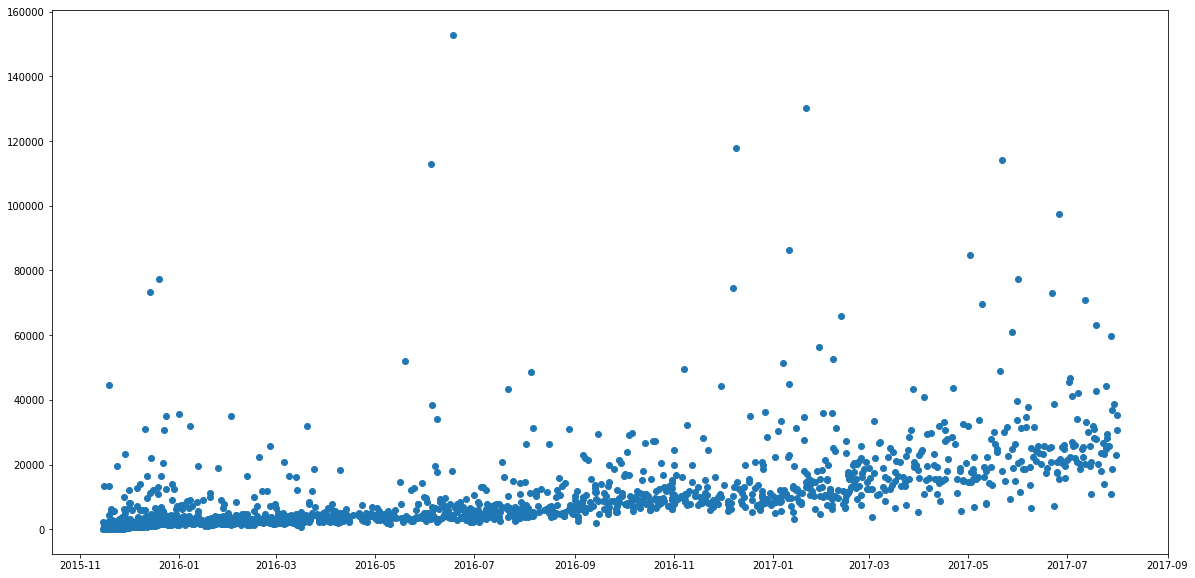

In [269]:
plt.figure(figsize=(20,10))
plt.plot_date(tweets_c.timestamp.dt.date, tweets_c.favorite_count)

In [270]:
tweets_c.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000
mean,7.356567e+17,12.253399,10.534240,8106.674220,2391.324773
std,6.739555e+16,41.557061,7.335369,11939.702522,4278.180058
min,6.660209e+17,0.000000,2.000000,69.000000,11.000000
25%,6.758285e+17,10.000000,10.000000,1744.000000,535.250000
50%,7.083530e+17,11.000000,10.000000,3663.000000,1158.000000
75%,7.873791e+17,12.000000,10.000000,10069.500000,2725.250000
max,8.924206e+17,1776.000000,170.000000,152794.000000,75635.000000


In [273]:
tweets_c[tweets_c.favorite_count == max(tweets_c.favorite_count)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,jpg_url,dog_breed
769,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,152794,75635,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever


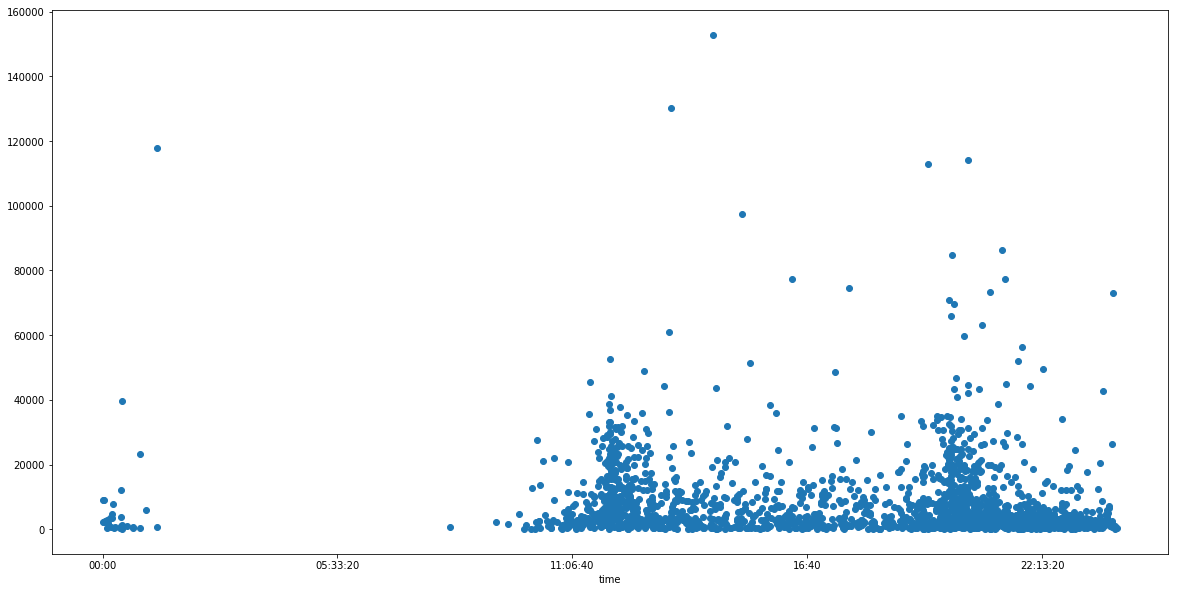

In [279]:
plt.figure(figsize=(20,10))
plt.plot_date(tweets_c.timestamp.dt.time, tweets_c.favorite_count)

([<matplotlib.patches.Wedge at 0x7fdb37a83978>,
 [Text(0.972004,0.514984,'Not a dog'),
  Text(0.373496,1.03465,'golden_retriever'),
  Text(-0.0782364,1.09721,'Labrador_retriever'),
  Text(-0.417332,1.01776,'Pembroke'),
  Text(-0.694549,0.852996,'Chihuahua'),
  Text(-0.878743,0.661672,'pug'),
  Text(-0.981604,0.496442,'toy_poodle'),
  Text(-1.04648,0.338926,'chow'),
  Text(-1.08399,0.187013,'Pomeranian'),
  Text(-1.09914,0.0434901,'Samoyed'),
  Text(-1.0967,-0.0851774,'malamute'),
  Text(-1.08247,-0.195581,'Chesapeake_Bay_retriever'),
  Text(-1.05859,-0.298961,'French_bulldog'),
  Text(-1.0255,-0.397938,'cocker_spaniel'),
  Text(-0.987041,-0.485542,'miniature_pinscher'),
  Text(-0.948248,-0.557517,'Eskimo_dog'),
  Text(-0.908162,-0.620679,'Cardigan'),
  Text(-0.864952,-0.679602,'German_shepherd'),
  Text(-0.819087,-0.734232,'Siberian_husky'),
  Text(-0.771021,-0.784555,'beagle'),
  Text(-0.719868,-0.831739,'Staffordshire_bullterrier'),
  Text(-0.665835,-0.875593,'Shih-Tzu'),
  Text(-0.6

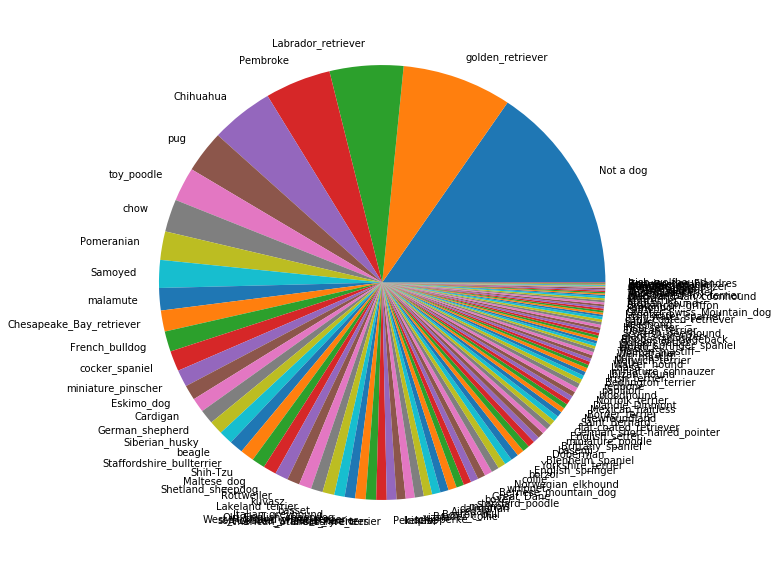

In [303]:
plt.figure(figsize=(10,10))
plt.pie(tweets_c.dog_breed.value_counts(), labels=tweets_c.dog_breed.value_counts().index)

([<matplotlib.patches.Wedge at 0x7fdb3791cf60>,
 [Text(-0.973628,0.511906,'None'),
  Text(0.877696,-0.663061,'Pupper'),
  Text(1.07574,-0.229724,'Doggo'),
  Text(1.09801,-0.0660823,'Puppo'),
  Text(1.09989,-0.0156599,'Floofer'),
  Text(1.1,-0.00174002,'')])

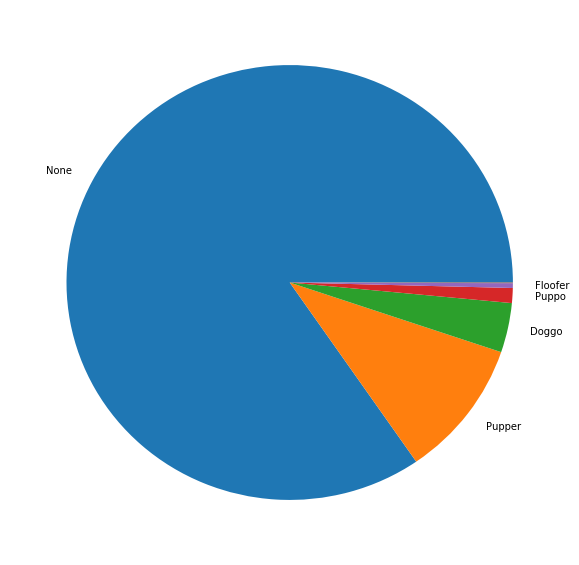

In [304]:
plt.figure(figsize=(10,10))
plt.pie(tweets_c.dog_type.value_counts(), labels=tweets_c.dog_type.value_counts().index)

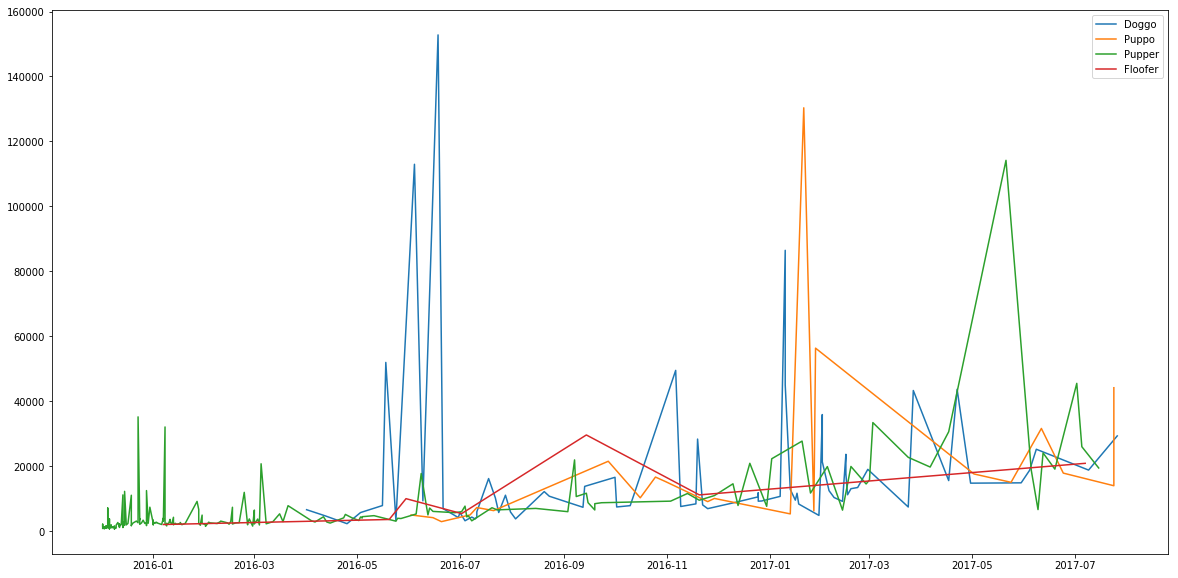

In [318]:
plt.figure(figsize=(20,10))
plt.plot(tweets_c[tweet_c.dog_type == 'Doggo'].timestamp.dt.date, tweets_c[tweet_c.dog_type == 'Doggo'].favorite_count)
plt.plot(tweets_c[tweet_c.dog_type == 'Puppo'].timestamp.dt.date, tweets_c[tweet_c.dog_type == 'Puppo'].favorite_count)
plt.plot(tweets_c[tweet_c.dog_type == 'Pupper'].timestamp.dt.date, tweets_c[tweet_c.dog_type == 'Pupper'].favorite_count)
plt.plot(tweets_c[tweet_c.dog_type == 'Floofer'].timestamp.dt.date, tweets_c[tweet_c.dog_type == 'Floofer'].favorite_count)
plt.legend(['Doggo', 'Puppo', 'Pupper', 'Floofer'])